#Diamonds

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Skyfallup/Summer-CSCI381-11/main/diamonds.csv",index_col=0)

##Data Summary


**Carat**(0.2--5.01)- A carat is a way to measure the weight of a diamond. A full carat weighs 200 milligrams. There are many ways to describe the weight of a diamond in terms of a carat. For example, a jeweler may call .25 carats a 'twenty-five pointer'. A way jewelers would describe a carat if it were greater than one would be in terms of the carat and then the decimal for instance, 1.08 carat would be called "one point oh eight carats."(https://4cs.gia.edu/en-us/diamond-carat-weight/) 


**Cut**(Fair, Good, Very Good, Premium, Ideal)- A cut is how well a diamond interacts with light. The better the cut the better the final beauty and worth. Usually connected with the cut is how well reflects off the diamond. A very well symmetric and deep diamond will directly affect the return of light. There are three things used to study how well a diamond interacts with light these are:
*  Brightness: white light reflected from the diamond.
* Fire: How dispersed white light is onto all the colors of the rainbow.
*  Scintillation: Amount of sparkle a diamond creates, as well as the pattern of light caused by the reflections in the diamond.

(https://4cs.gia.edu/en-us/diamond-cut/)

**Color**(D (Best) to J (Worst))- The colors of diamonds also affect their value. With the highest valued color being D, which is considered "absolutely" colorless. As the color of diamonds go down from D to J the diamonds enter the range of showing color usually yellow tones/hints. Unless looked side by side to other ranked diamonds the naked eye will not be able to detect the color tones. Color is also more visible in diamonds that are larger. (https://www.bluenile.com/education/diamonds/color)

**Clarity**(I1 (Worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (Best))- Clarity refers to how many blemishes and inclusions a diamond has. There are no completely pure diamonds, however trying to get as close to complete purity is what the clarity scale is for. I1 being the worst, in other words having the most blemishes, inclusions and IF being the best having the least number of blemishes and inclusions.
(https://4cs.gia.edu/en-us/diamond-clarity/)

**X**(0--10.74)- X refers to the length of the diamond. Our dataset measures in millimeters.

**Y**(0--58.9)- Y refers to the width of the diamond. Once again measured in millimeters.

**Depth**(43-79)- Depth refers to the total depth percentage which is achieved through the formula z / mean(x,y).

**Table**(43-95) - Table is the width of the top of a diamond relative to the widest point. The flat area on top of the diamond is the table when looking directly above a diamond. The table plays a big role in how sparkly the diamond is. (https://www.diamonds.pro/education/diamond-depth-and-table/)

**4C's**- The standard of modern society for analyzing the quality of diamonds are the 4C's. The four being Color, Clarity, Cut and Carat Weight.(https://4cs.gia.edu/en-us/4cs-diamond-quality/)

**Number of Diamonds** In our data set we have 53,940 diamonds we got this through our use of df.describe() below.


**Datatypes of Attributes** Below contains the datatypes of the attributes in the dataset.

In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

##Exploratory Data Analysis

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Summary Statistics**

We can see thanks to pandas a general summary of the statistics in our pandas data frame that we imported from our csv dataset. From here we can easily see general information about our data and notice immediately some anomolies specifically the minimum value of our X, Y and Z.

In [5]:
df.replace(0,df.mean(axis=0),inplace=True)
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540046
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


To solve the issues of the "0" anomolies in X, Y and Z we can replace the 0's with the mean. Without the anomolies now our graphs will be more accurate to what we want to represent.

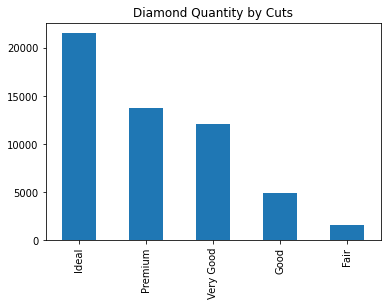

In [6]:
%matplotlib inline
cutBPLT = df['cut'].value_counts().plot.bar(title = "Diamond Quantity by Cuts")

From the "Diamond Quantity by Cuts" graph we can see that the highest ranked cut by quality is also the most abundant. While the least ranked cut by quality makes up the least amount of diamonds.

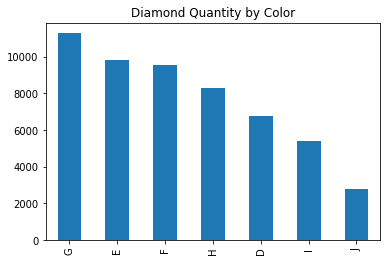

In [7]:
colorBPLT = df['color'].value_counts().plot.bar(title = "Diamond Quantity by Color")

We can see that the case with the cuts, however, does not appear to be the same for color. As for color the highest rank would be D. However, D does not make up most of the diamonds, but it is G. G being the middle of the ranks in quality, makes up most of the diamonds. 

 

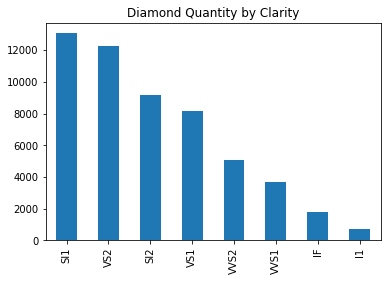

In [8]:
clarityBPLT = df['clarity'].value_counts().plot.bar(title = "Diamond Quantity by Clarity")

It seems there may be a pattern with clarity and color as unlike the with cuts where the highest quality was the most abundant, this times just like color for clarity the middle of all the qualities is the most popular.

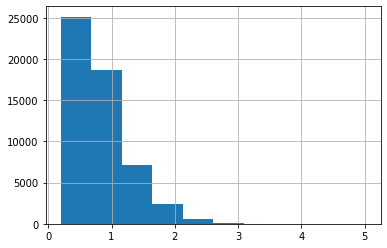

In [9]:
df['carat'].hist()

The histogram graph of carat shows that most of the diamonds are between 0-1 carat. As the carats get larger we notice that the number of diamonds decreases.

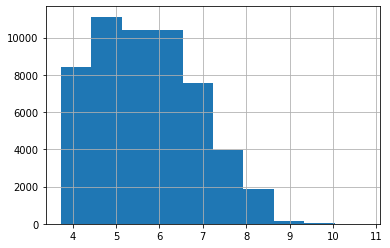

In [10]:
df['x'].hist()

As the X grows larger the number of diamonds decreases.

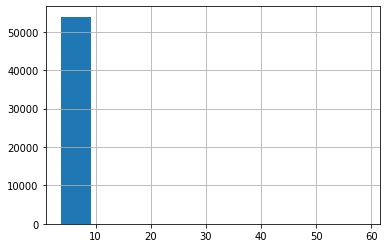

In [11]:
df['y'].hist()

From the current histogram we can see that there is an outlier that is insanely wide in width, however we should not exclude it as it is possible to exist. Unlike when we removed the 0s.

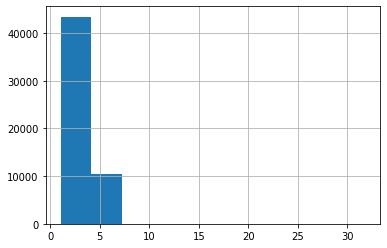

In [12]:
df['z'].hist()

Same goes for the depth as it is possible that there may be a diamond with that large of a depth. It is in the realm of possibility.

In [13]:
correlation=df.corr()
print(correlation)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.977640  0.953870  0.960431
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025093 -0.029138  0.094986
table  0.181618 -0.295779  1.000000  0.127134  0.196078  0.184470  0.152426
price  0.921591 -0.010647  0.127134  1.000000  0.887004  0.867653  0.867575
x      0.977640 -0.025093  0.196078  0.887004  1.000000  0.974928  0.975111
y      0.953870 -0.029138  0.184470  0.867653  0.974928  1.000000  0.956449
z      0.960431  0.094986  0.152426  0.867575  0.975111  0.956449  1.000000


From df.correlation we can see that carat, X, Y and Z have a positive with each other, in that as one attribute increases the other 3 have a chance to increase as well. We can also see that carat has a highly positive relationship with price as well, once again as carat or price increases it's likely that the other will increase too. 

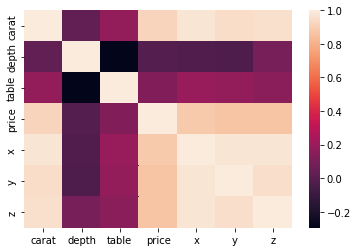

In [14]:
sns.heatmap(correlation)

A visual representation of the above correlation we can see that the previous statements made are now shown visually. carat, X, Y  and Z are a brighter color when relating to each other and carat is in bright relationship with price.

##Inferences

1. **What proportion of diamonds are between .30 and 1.08 carats?**

In [15]:
#We know there is 53,940 diamonds so we just need to find out how many diamonds are between .30 and 1.08 carats
#will be our final answer
caratProportion = 0
#counter to keep track of how much follow our conditions of  .30<x<1.08
caratCounter = 0
#make a list with all of the carat column
caratList = df['carat'].tolist()
#loop through whole list and see how many follow our conditions
for x in caratList:
  if x > .30 and x < 1.08:
    caratCounter +=1
#we know 53940 diamonds so we just divide it and we get the proportion
caratProportion=caratCounter/53940
#prints the proportion
print(caratProportion)

0.6939933259176864


0.6939933259176864


2.**How many diamonds have equal x and y dimensions?**

In [16]:
ylistCounter = 0
xandysameCounter=0
xList = df['x'].tolist()
yList = df['y'].tolist()
for x in xList:
  if x == yList[ylistCounter]:
    xandysameCounter+=1
  ylistCounter+=1
print(xandysameCounter)

10


10

3.**How many of the diamonds have a carat value that is less than the mean carat value?**


In [17]:
#we know the mean carat value thanks to df.describe() earlier which is .797940
lessthanmeanCarat = 0
#go through whole list and if they are less than the mean add to counter
for x in caratList:
  if x < .797940:
    lessthanmeanCarat+=1
#print counter
print(lessthanmeanCarat)

31127


31127

4.**How many diamonds have a premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal**

In [18]:
#A premium cut or better would be Premium or Ideal
premiumcutorbetterCounter = 0
#new list with cut
cutList = df['cut'].tolist()
for x in cutList:
  if x == 'Premium' or x=='Ideal':
#if premium or ideal add to counter
    premiumcutorbetterCounter += 1
#premium or better counter print
print(premiumcutorbetterCounter)

35342


35342

5.**Which diamond has the highest price per carat? What is its value?**

In [19]:
#To get price by carat we divide price by carat
pricepercaratList = []
#convert price to a list
priceList = df['price'].tolist()
#counter to iterate through price
counterforPrice = 0 
#loop so we can go through caratlist and we iterate price dividing carat by price then appending/adding the value to our new pricepercaratList
for x in caratList:
 pricepercaratList.append(priceList[counterforPrice]/x)
 counterforPrice+=1

#print(pricepercaratList)
#simple just getting max of list
max_val = max(pricepercaratList)
#getting index of our max
idx_max = pricepercaratList.index(max_val)

print("The highest price per carat is: ")
print(max_val)
print("The index is: ")
print(idx_max)
print("The diamond number is :")
print(idx_max+1)

The highest price per carat is: 
17828.846153846152
The index is: 
27635
The diamond number is :
27636


The highest price per carat is: 
17828.846153846152
The index is: 
27635
The diamond number is :
27636

6.**Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearances of the boxplots.**

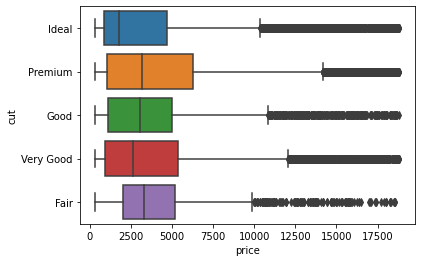

In [20]:
sns.boxplot(x=df['price'],y=df['cut'])

From the appearance of the boxplots, we can assume a couple of things:
* Premium, Good, and Fair seem to have a median that is at the same price
* Every cut except fair seems to have a similar lower quartile
* Premium will make the most on an upper quartile battle


7.**Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?**

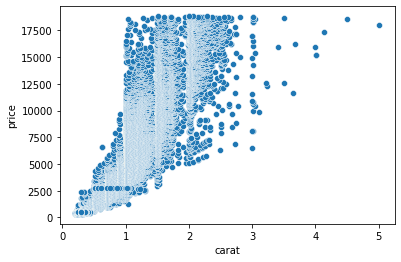

In [21]:
sns.scatterplot(x=df['carat'],y=df['price'])

Based on the scatterplot what we can say about their relationship is that it's a positive trend. (Moes left to right upwards) As well as many of the prices are between 1-2 carat. They have a positive relation as one goes up the other does as well. 

##Conclusion

In conclusion there were many things that I can take away from this quiz. I have developed a deeper understanding of diamonds. Through the scatterplot I learned that the relationship between carat and price is positively upwards, I learned that a premium cut has the highest upper quartile as well as premium, good and fair having a very close similar median. I became aware of the cooralation between carat, x , y and z. Finally learned that diamond cuts may be the most common based on our dataset. 

##References

Learn what Carat means and what diamond carat measures: 4Cs of Diamond Quality by Gia. GIA 4Cs. (2019, December 9). Retrieved June 13, 2022, from https://4cs.gia.edu/en-us/diamond-carat-weight/ 

What is diamond clarity: The 4Cs of Diamond Quality by Gia. GIA 4Cs. (2019, December 9). Retrieved June 13, 2022, from https://4cs.gia.edu/en-us/diamond-clarity/ 

Learn what diamond cut actually means and all about diamond cut grades: 4Cs of Diamond Quality. GIA 4Cs. (2019, December 9). Retrieved June 13, 2022, from https://4cs.gia.edu/en-us/diamond-cut/ 

Ideal diamond depth and table by cut. The Diamond Pro. (2022, April 3). Retrieved June 13, 2022, from https://www.diamonds.pro/education/diamond-depth-and-table/ 

Diamond Color: Grade chart and buying tips | blue nile. (n.d.). Retrieved June 13, 2022, from https://www.bluenile.com/education/diamonds/color 

4Cs of Diamond Quality by Gia: Learn about diamond buying: What are the diamond 4cs. GIA 4Cs. (2021, October 6). Retrieved June 13, 2022, from https://4cs.gia.edu/en-us/4cs-diamond-quality/ 